In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:

df=pd.read_csv(r"D:\subjects\year_2_sem_4_Data_Science\Python-int 375\CA2\Air_Quality.csv")
df.head(10)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01-01-2015,0.3,NaN
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,06-01-2014,24.9,NaN
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06-01-2014,30.7,NaN
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06-01-2014,32.0,NaN
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06-01-2014,31.9,NaN
5,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01-01-2015,1.2,NaN
6,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12-01-2011,8.6,NaN
7,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12-01-2011,8.0,NaN
8,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06-01-2022,6.1,NaN
9,221962,386,Ozone (O3),Mean,ppb,UHF34,306308.0,Chelsea-Village,Summer 2014,06-01-2014,25.3,NaN


In [ ]:
print(df.info())  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB
None


In [ ]:

df.isnull().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64

In [ ]:

columns_to_drop = ["Unique ID", "Indicator ID", "Geo Join ID", "Message"]
df_cleaned = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)
df_cleaned.columns

Index(['Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Place Name',
       'Time Period', 'Start_Date', 'Data Value'],
      dtype='object')

In [ ]:

df_cleaned["Season"] = df_cleaned["Time Period"].apply(lambda x: x.split()[0] if any(s in x for s in ["Summer", "Winter", "Annual"]) else None)
df_cleaned["Year"] = df_cleaned["Time Period"].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else None)
df_cleaned["Year"] = pd.to_datetime(df_cleaned["Year"], format="%Y", errors="coerce")
df_cleaned.head()


,Name,Measure,Measure Info,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Season,Year
0,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,Southeast Queens,2015,01-01-2015,0.3,None,2015-01-01
1,Ozone (O3),Mean,ppb,UHF34,Upper East Side-Gramercy,Summer 2014,06-01-2014,24.9,Summer,2014-01-01
2,Ozone (O3),Mean,ppb,UHF34,Fordham - Bronx Pk,Summer 2014,06-01-2014,30.7,Summer,2014-01-01
3,Ozone (O3),Mean,ppb,UHF34,East New York,Summer 2014,06-01-2014,32.0,Summer,2014-01-01
4,Ozone (O3),Mean,ppb,UHF34,Pelham - Throgs Neck,Summer 2014,06-01-2014,31.9,Summer,2014-01-01


In [ ]:

df_cleaned["Time Period"] = pd.to_datetime(df_cleaned["Time Period"], errors="coerce")
df_cleaned["Start_Date"] = pd.to_datetime(df_cleaned["Start_Date"], format="%d-%m-%Y", errors="coerce")
df_cleaned["Time Period"] = df_cleaned["Time Period"].fillna(df_cleaned["Start_Date"])
df_cleaned["Year"] = df_cleaned["Time Period"].dt.year

df_cleaned.head()


,Name,Measure,Measure Info,Geo Type Name,Geo Place Name,Time Period,Start_Date,Data Value,Season,Year
0,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,Southeast Queens,2015-01-01,2015-01-01,0.3,None,2015.0
1,Ozone (O3),Mean,ppb,UHF34,Upper East Side-Gramercy,2014-01-06,2014-01-06,24.9,Summer,2014.0
2,Ozone (O3),Mean,ppb,UHF34,Fordham - Bronx Pk,2014-01-06,2014-01-06,30.7,Summer,2014.0
3,Ozone (O3),Mean,ppb,UHF34,East New York,2014-01-06,2014-01-06,32.0,Summer,2014.0
4,Ozone (O3),Mean,ppb,UHF34,Pelham - Throgs Neck,2014-01-06,2014-01-06,31.9,Summer,2014.0


In [ ]:
def assign_season(date):
    if pd.isna(date):  # 
        return None
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"


df_cleaned["Season"] = df_cleaned["Season"].fillna(df_cleaned["Time Period"].apply(assign_season))

df_cleaned[["Time Period", "Season"]].head(10)

,Time Period,Season
0,2015-01-01,Winter
1,2014-01-06,Summer
2,2014-01-06,Summer
3,2014-01-06,Summer
4,2014-01-06,Summer
5,2015-01-01,Winter
6,2011-01-12,Annual
7,2011-01-12,Annual
8,2022-01-06,Summer
9,2014-01-06,Summer


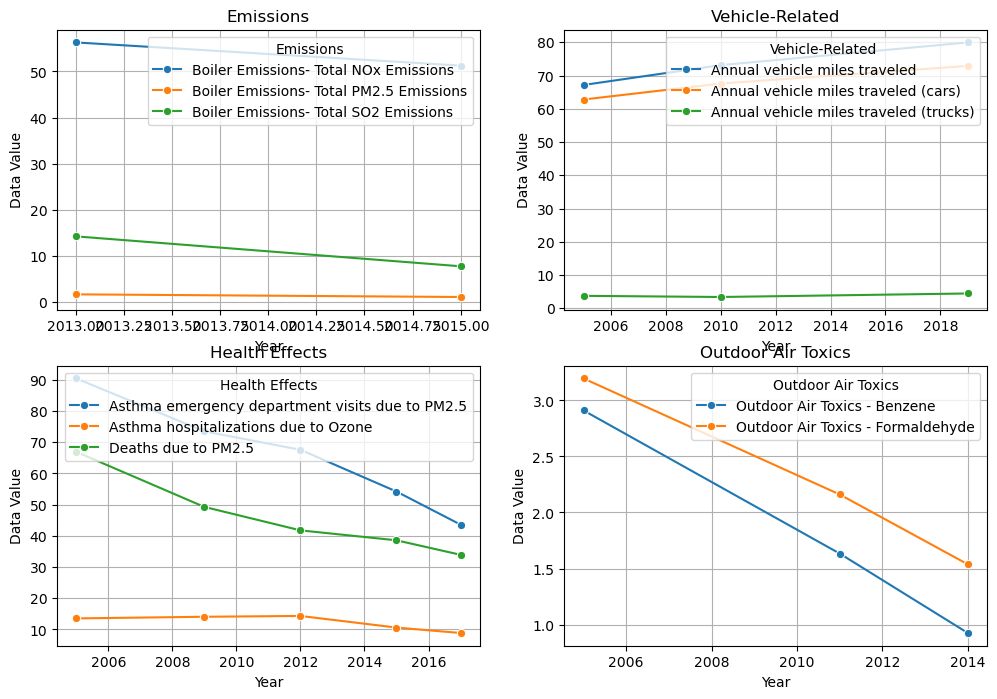

In [16]:
#Objectives 

#1. Trend Analysis of Air Quality Over Time

# Define categories of pollutants
categories = {
    "Emissions": [
        "Boiler Emissions- Total NOx Emissions",
        "Boiler Emissions- Total PM2.5 Emissions",
        "Boiler Emissions- Total SO2 Emissions"
    ],
    "Vehicle-Related": [
        "Annual vehicle miles traveled",
        "Annual vehicle miles traveled (cars)",
        "Annual vehicle miles traveled (trucks)"
    ],
    "Health Effects": [
        "Asthma emergency department visits due to PM2.5",
        "Asthma hospitalizations due to Ozone",
        "Deaths due to PM2.5"
    ],
    "Outdoor Air Toxics": [
        "Outdoor Air Toxics - Benzene",
        "Outdoor Air Toxics - Formaldehyde"
    ]
}
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes = axes.flatten()

for i, (category, pollutants) in enumerate(categories.items()):
    ax = axes[i]  # Select subplot
    subset = df_cleaned[df_cleaned["Name"].isin(pollutants)]  
    trend_data = subset.groupby(["Year", "Name"])["Data Value"].mean().reset_index()
    sns.lineplot(data=trend_data, x="Year", y="Data Value", hue="Name", marker="o", ax=ax)
    ax.set_title(category)
    ax.set_xlabel("Year")
    ax.set_ylabel("Data Value")
    ax.legend(title=category, loc="upper right")
    ax.grid()
plt.show()


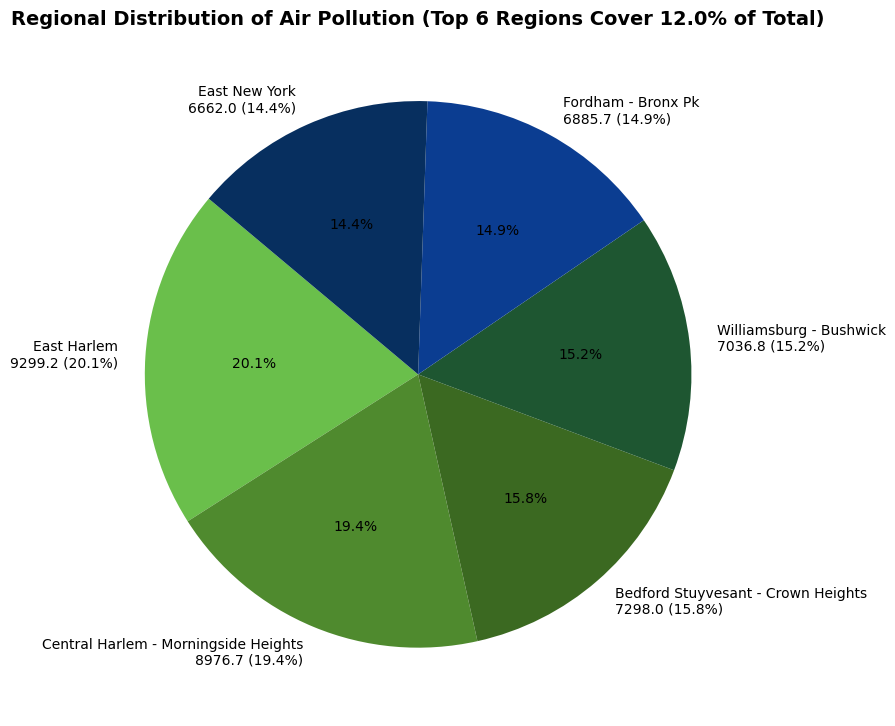

In [ ]:
#2. Regional Comparison of Air Pollution
region_distribution = df_cleaned.groupby("Geo Place Name")["Data Value"].sum().sort_values(ascending=False)

top_regions = region_distribution.head(6)

coverage_percentage = (top_regions.sum() / region_distribution.sum()) * 100

nature_palette = ["#6ABF4B", "#4F8A2E", "#3B6921", "#1E5631", "#0B3D91", "#072F5F"]
plt.figure(figsize=(9, 9))
labels = [f"{region}\n{value:.1f} ({value / top_regions.sum() * 100:.1f}%)" 
          for region, value in zip(top_regions.index, top_regions)]

plt.pie(top_regions, labels=labels, autopct="%1.1f%%", colors=nature_palette, 
        startangle=140, wedgeprops={"edgecolor": "none"})  # No dividing lines
plt.title(f"Regional Distribution of Air Pollution (Top 6 Regions Cover {coverage_percentage:.1f}% of Total)", 
          fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()



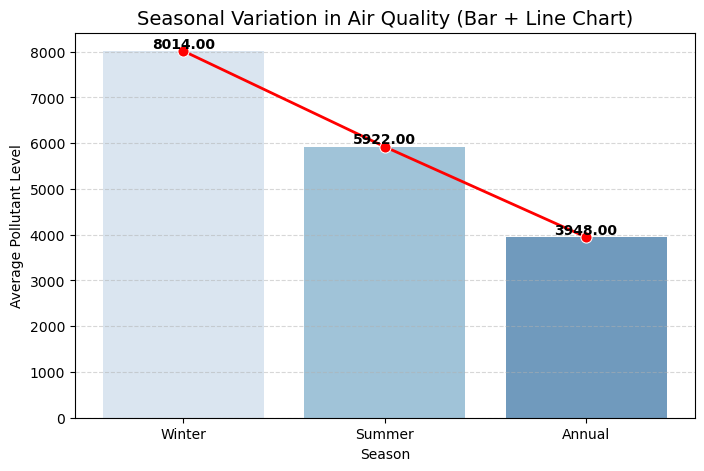

In [ ]:
# 3. Seasonal Variation in Air Quality

season_counts = df_cleaned["Season"].value_counts()
required_seasons = ["Winter", "Summer", "Annual"]
df_filtered = season_counts[season_counts.index.isin(required_seasons)].reset_index()
df_filtered.columns = ["Season", "Data Value"]
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Season", y="Data Value", data=df_filtered, hue="Season", dodge=False, legend=False, palette="Blues", alpha=0.7)
sns.lineplot(x="Season", y="Data Value", data=df_filtered, marker="o", color="red", linewidth=2, markersize=8)
for i, row in df_filtered.iterrows():
    plt.text(i, row["Data Value"] + 0.5, f"{row['Data Value']:.2f}", 
             ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")
plt.title("Seasonal Variation in Air Quality (Bar + Line Chart)", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Average Pollutant Level")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

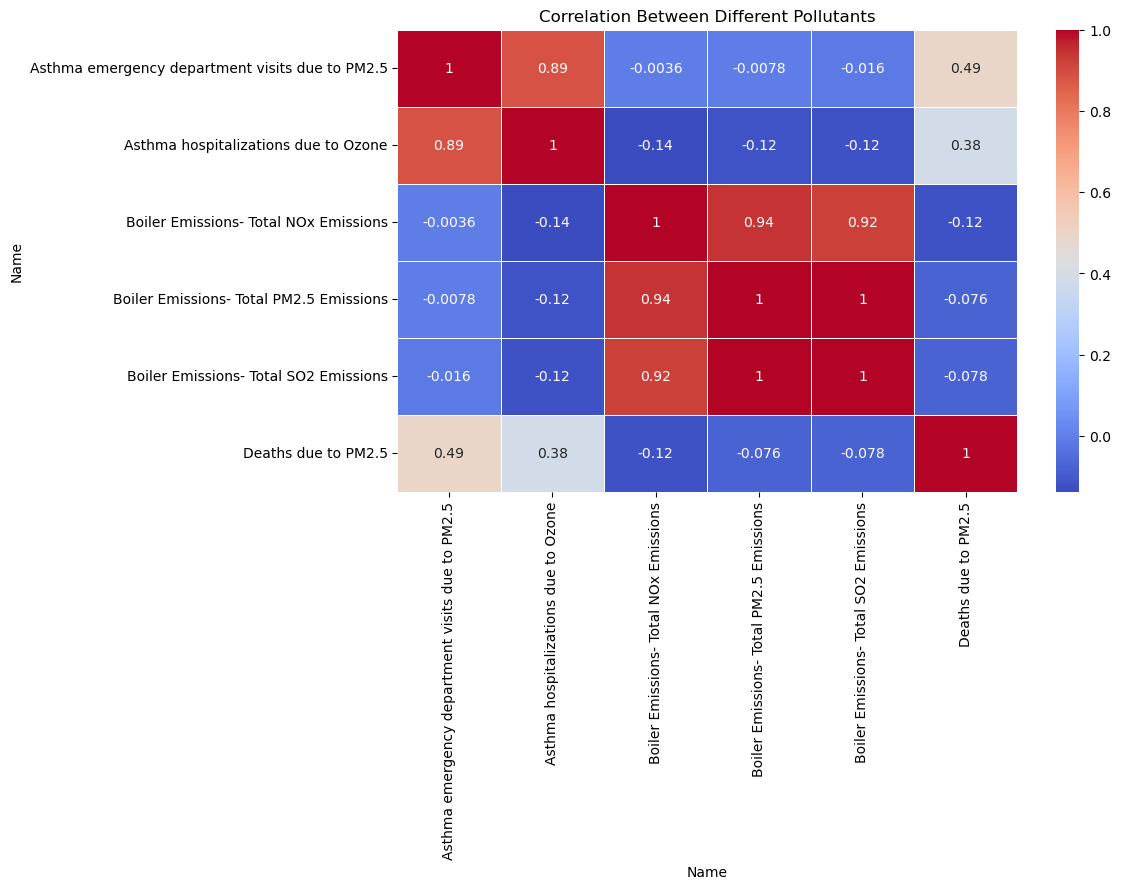

In [ ]:

#4. Correlation Between Different Pollutants

df_cleaned.columns = df_cleaned.columns.str.strip()  

df_cleaned["Start_Date"] = pd.to_datetime(df_cleaned["Start_Date"], errors="coerce")

df_cleaned["Year"] = df_cleaned["Start_Date"].dt.year


pollutants = [
    "Boiler Emissions- Total NOx Emissions",
    "Boiler Emissions- Total PM2.5 Emissions",
    "Boiler Emissions- Total SO2 Emissions",
    "Asthma emergency department visits due to PM2.5",
    "Asthma hospitalizations due to Ozone",
    "Deaths due to PM2.5"
]

df_pollutants = df_cleaned[df_cleaned["Name"].isin(pollutants)].copy()


if "Year" not in df_pollutants.columns:
    raise KeyError("The column 'Year' is missing from the dataset!")

if df_pollutants.empty:
    raise ValueError("No data available for the selected pollutants. Check the dataset.")
df_pivot = df_pollutants.pivot_table(
    index=["Year", "Geo Place Name"],
    columns="Name",
    values="Data Value",
    aggfunc="mean"
)

corr_matrix = df_pivot.corr()

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Different Pollutants")
plt.show()



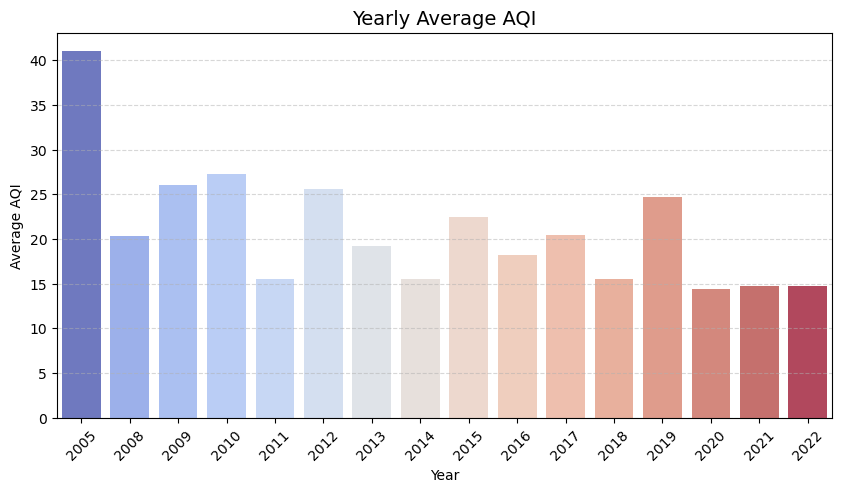

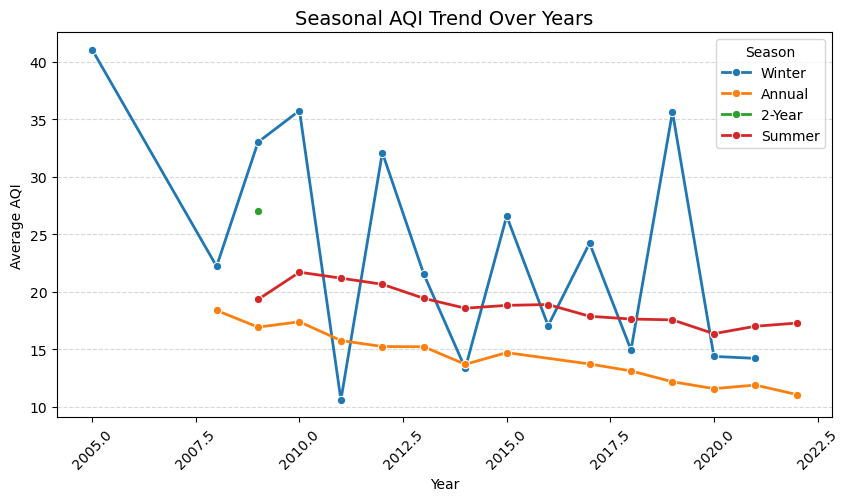

In [ ]:

#5. Air Quality Index (AQI) Calculation

df_cleaned["Year"] = df_cleaned["Year"].replace([np.inf, -np.inf], np.nan)
df_cleaned["Year"] = df_cleaned["Year"].fillna(df_cleaned["Year"].median()).astype(int)
df_cleaned["Data Value"] = df_cleaned["Data Value"].fillna(df_cleaned["Data Value"].mean())

# Yearly Average AQI
df_yearly_aqi = df_cleaned.groupby("Year")["Data Value"].mean().reset_index()

# Seasonal Average AQI 
if "Season" in df_cleaned.columns:
    df_seasonal_aqi = df_cleaned.groupby(["Year", "Season"])["Data Value"].mean().reset_index()
else:
    df_seasonal_aqi = None

# ========== YEARLY AQI TREND ==========
plt.figure(figsize=(10, 5))
sns.barplot(x="Year", y="Data Value", hue="Year", data=df_yearly_aqi, palette="coolwarm", dodge=False, legend=False, alpha=0.8)
plt.title("Yearly Average AQI", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# ========= SEASONAL AQI TREND ==========
if df_seasonal_aqi is not None:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="Year", y="Data Value", data=df_seasonal_aqi, hue="Season", marker="o", linewidth=2, palette="tab10")
    plt.title("Seasonal AQI Trend Over Years", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("Average AQI")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()